In [1]:
#Importing libaries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.shape

(768, 9)

In [6]:
#To check whether we have null values:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#Outlier treatment:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
floor=df.quantile(0.99)
floor

Pregnancies                  13.00000
Glucose                     196.00000
BloodPressure               106.00000
SkinThickness                51.33000
Insulin                     519.90000
BMI                          50.75900
DiabetesPedigreeFunction      1.69833
Age                          67.00000
Outcome                       1.00000
Name: 0.99, dtype: float64

In [9]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [10]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [11]:
X=X.apply(lambda x: outlier_capping(x))
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.834635,121.272135,69.053385,20.433125,78.604427,31.936031,0.468461,33.205729
std,3.336808,30.807518,19.243340,15.646206,109.425722,7.712781,0.314849,11.645318
min,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.094680,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,13.000000,196.000000,106.000000,51.330000,519.900000,50.759000,1.698330,67.000000


In [12]:
df['Outcome'].mean()

0.3489583333333333

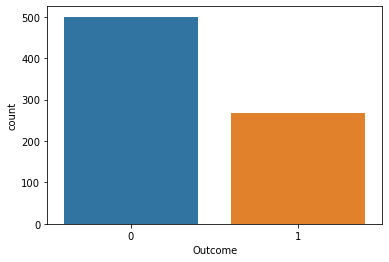

In [13]:
sns.countplot(x="Outcome",data=df )

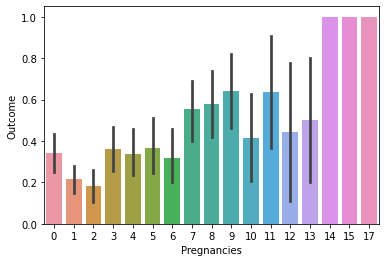

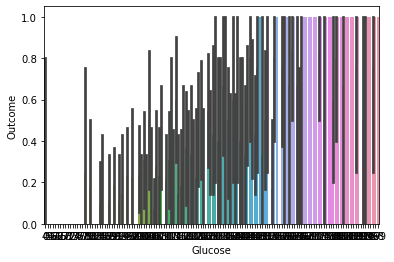

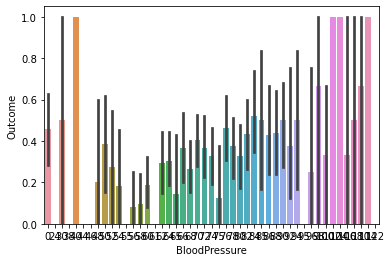

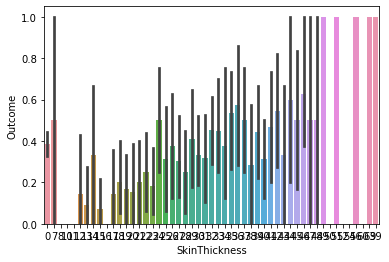

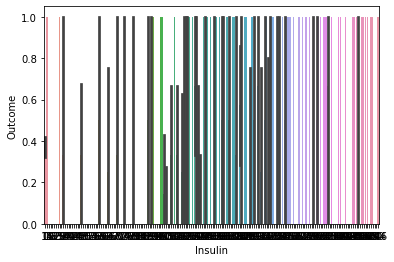

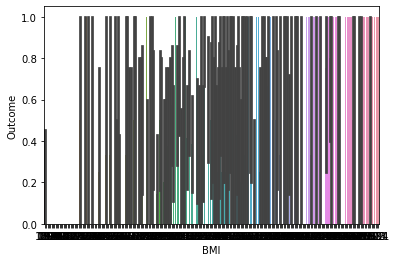

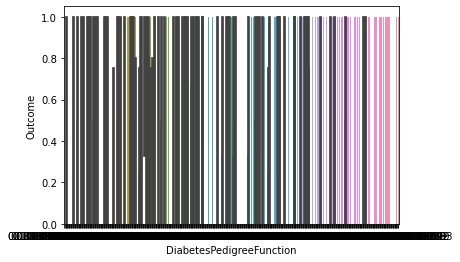

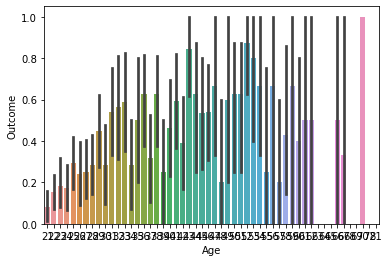

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
for col in (X.columns):
    plt.figure()
    sns.barplot(x=col, y="Outcome",data=df,estimator=mean )
plt.show()

In [15]:
#Since the graphs are messy..we can create rank and then plot them and we study the pattern across each rank:
df['Glucose_rank']=pd.qcut(df['Glucose'].rank(method='first').values,20,duplicates='drop').codes+1
df.groupby('Glucose_rank')['Outcome'].mean()

Glucose_rank
1     0.076923
2     0.078947
3     0.076923
4     0.078947
5     0.105263
6     0.205128
7     0.210526
8     0.236842
9     0.256410
10    0.315789
11    0.315789
12    0.307692
13    0.368421
14    0.500000
15    0.410256
16    0.526316
17    0.500000
18    0.692308
19    0.868421
20    0.846154
Name: Outcome, dtype: float64

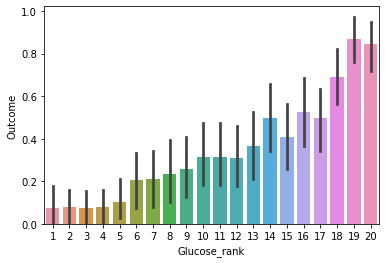

In [16]:
sns.barplot(x='Glucose_rank',y='Outcome',data=df)

In [17]:
df['Pregnancies_rank']=pd.qcut(df['Pregnancies'].rank(method='first').values,20,duplicates='drop').codes+1
df.groupby('Pregnancies_rank')['Outcome'].mean()

Pregnancies_rank
1     0.435897
2     0.289474
3     0.307692
4     0.157895
5     0.263158
6     0.128205
7     0.236842
8     0.289474
9     0.128205
10    0.289474
11    0.394737
12    0.333333
13    0.315789
14    0.473684
15    0.282051
16    0.368421
17    0.631579
18    0.589744
19    0.500000
20    0.564103
Name: Outcome, dtype: float64

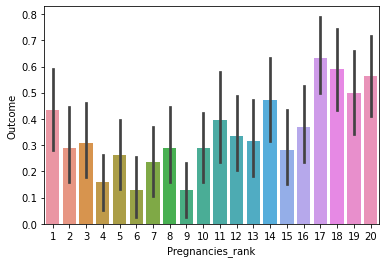

In [18]:
sns.barplot(x='Pregnancies_rank',y='Outcome',data=df)

In [19]:
df['BloodPressure_rank']=pd.qcut(df['BloodPressure'].rank(method='first').values,20,duplicates='drop').codes+1
df.groupby('BloodPressure_rank')['Outcome'].mean()

BloodPressure_rank
1     0.435897
2     0.315789
3     0.076923
4     0.157895
5     0.289474
6     0.282051
7     0.315789
8     0.289474
9     0.333333
10    0.500000
11    0.315789
12    0.282051
13    0.394737
14    0.394737
15    0.333333
16    0.342105
17    0.552632
18    0.435897
19    0.473684
20    0.461538
Name: Outcome, dtype: float64

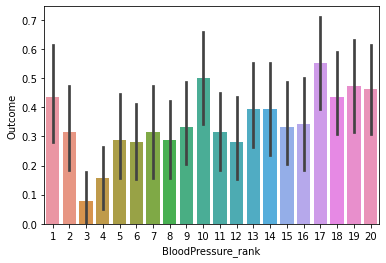

In [20]:
sns.barplot(x='BloodPressure_rank',y='Outcome',data=df)

In [21]:
df['SkinThickness_rank']=pd.qcut(df['SkinThickness'].rank(method='first').values,20,duplicates='drop').codes+1
df.groupby('SkinThickness_rank')['Outcome'].mean()

SkinThickness_rank
1     0.384615
2     0.447368
3     0.512821
4     0.263158
5     0.289474
6     0.410256
7     0.105263
8     0.105263
9     0.205128
10    0.210526
11    0.315789
12    0.333333
13    0.263158
14    0.315789
15    0.461538
16    0.473684
17    0.526316
18    0.384615
19    0.447368
20    0.512821
Name: Outcome, dtype: float64

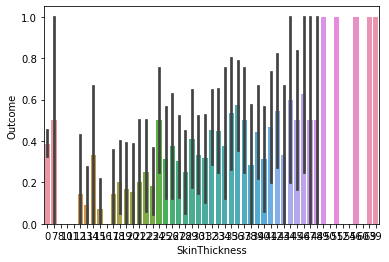

In [22]:
sns.barplot(x='SkinThickness',y='Outcome',data=df)

In [23]:
df['Insulin_rank']=pd.qcut(df['Insulin'].rank(method='first').values,20,duplicates='drop').codes+1
df.groupby('Insulin_rank')['Outcome'].mean()

Insulin_rank
1     0.410256
2     0.289474
3     0.333333
4     0.500000
5     0.500000
6     0.333333
7     0.157895
8     0.315789
9     0.435897
10    0.368421
11    0.052632
12    0.076923
13    0.157895
14    0.184211
15    0.333333
16    0.447368
17    0.526316
18    0.487179
19    0.473684
20    0.589744
Name: Outcome, dtype: float64

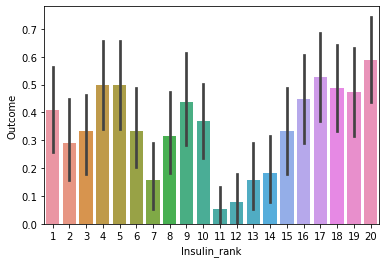

In [24]:
sns.barplot(x='Insulin_rank',y='Outcome',data=df)

In [25]:
df['BMI_rank']=pd.qcut(df['BMI'].rank(method='first').values,20,duplicates='drop').codes+1
df.groupby('BMI_rank')['Outcome'].mean()

BMI_rank
1     0.051282
2     0.105263
3     0.076923
4     0.131579
5     0.157895
6     0.256410
7     0.289474
8     0.368421
9     0.435897
10    0.447368
11    0.421053
12    0.435897
13    0.473684
14    0.421053
15    0.487179
16    0.368421
17    0.447368
18    0.358974
19    0.657895
20    0.589744
Name: Outcome, dtype: float64

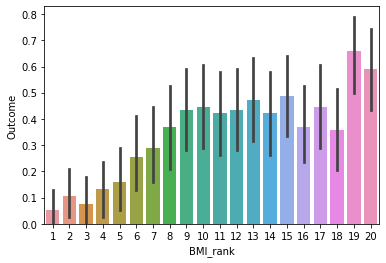

In [26]:
sns.barplot(x='BMI_rank',y='Outcome',data=df)

In [27]:
df['DiabetesPedigreeFunction_rank']=pd.qcut(df['DiabetesPedigreeFunction'].rank(method='first').values,20,duplicates='drop').codes+1
df.groupby('DiabetesPedigreeFunction_rank')['Outcome'].mean()

DiabetesPedigreeFunction_rank
1     0.230769
2     0.236842
3     0.153846
4     0.263158
5     0.394737
6     0.333333
7     0.394737
8     0.184211
9     0.256410
10    0.500000
11    0.315789
12    0.282051
13    0.263158
14    0.421053
15    0.333333
16    0.421053
17    0.447368
18    0.512821
19    0.447368
20    0.589744
Name: Outcome, dtype: float64

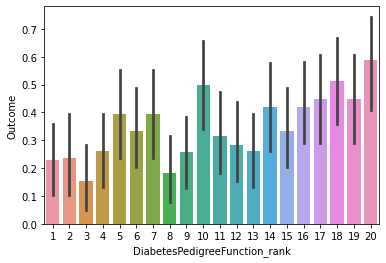

In [28]:
sns.barplot(x='DiabetesPedigreeFunction_rank',y='Outcome',data=df)

In [29]:
df['Age_rank']=pd.qcut(df['Age'].rank(method='first').values,20,duplicates='drop').codes+1
df.groupby('Age_rank')['Outcome'].mean()

Age_rank
1     0.076923
2     0.052632
3     0.179487
4     0.210526
5     0.210526
6     0.179487
7     0.289474
8     0.210526
9     0.358974
10    0.289474
11    0.368421
12    0.538462
13    0.447368
14    0.473684
15    0.487179
16    0.473684
17    0.684211
18    0.564103
19    0.578947
20    0.307692
Name: Outcome, dtype: float64

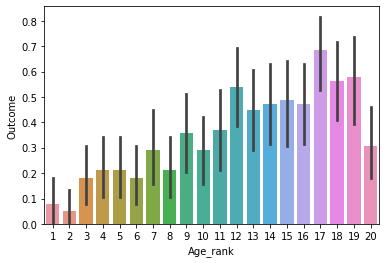

In [30]:
sns.barplot(x='Age_rank',y='Outcome',data=df)

In [31]:
X=df[['Glucose','BMI','Age','Pregnancies','Insulin','DiabetesPedigreeFunction']]
y=df['Outcome']

In [33]:
#Logistic Regression model:Implementing the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.3,random_state=42)
logreg=LogisticRegression()
model=logreg.fit(X_train,Y_train)

In [34]:
model.score(X_train,Y_train)

0.7783985102420856

In [35]:
model.score(X_test,Y_test)

0.7359307359307359

In [36]:
#Performance and Accuracy:
y_pred=model.predict(X_test)
y_pred_p=logreg.predict_proba(X)[:,1]
df['y_pred_p']=pd.DataFrame(y_pred_p)
df['p_rank']=pd.qcut(df['y_pred_p'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('p_rank')['Outcome'].mean()

p_rank
1     0.051948
2     0.025974
3     0.064935
4     0.223684
5     0.272727
6     0.389610
7     0.407895
8     0.480519
9     0.727273
10    0.844156
Name: Outcome, dtype: float64

In [37]:
#Confusion matrix:
cnf_matrix=metrics.confusion_matrix(Y_test,y_pred)
cnf_matrix

array([[123,  28],
       [ 33,  47]])

In [38]:
#classification report:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



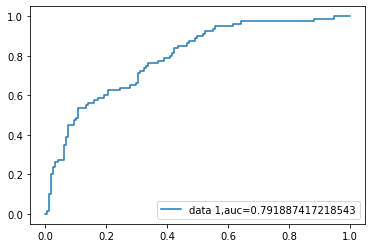

In [39]:
#To plot the roc curve:
y_pred_proba=logreg.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(Y_test,y_pred_proba)
auc=metrics.roc_auc_score(Y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1,auc="+str(auc))
plt.legend(loc=4)
plt.show()